# [프로젝트] 기술경쟁력지수에 따른 투자의견 컨센서스

---

## 프로젝트 목표
---
- 기술경쟁력지수 :
    R&D정보, 특허정보, 재무제표 데이터를 활용한 영향력지수/기술력지수/기술투자지수, TSS/TCG/APES 등의 지수 도출 
- 투자의견 컨센서스 :
    기술경쟁력지수를 머신러닝/딥러닝 모델에 적용하여 강력매도/매도/중립/매수/강력매수, 1 ~ 5 사이의 점수로 결과 도출과 그에 따른 투자의견 제시

## 프로젝트 목차
---
1. **데이터 불러오기:** 원천데이터파일(국가R_D과제/국가R_D성과/국가R_D연구보고서/기업정보상세/기업정보요약/특허정보상세/특허정보요약) CSV 불러오기
2. **데이터 크롤링:** 원천데이터파일 결측값 처리 방안으로 크롤링을 통한 데이터 복원 및 업데이트
2. **데이터 전처리하기:** 유의미한 데이터를 제공하기 위해 데이터를 전처리합니다.(통합 데이터 구칙 및 형태(데이터유형/표기방식) 통일)
3. **데이터 분석하기:** 다양한 방법(가설검정, 상관성분석, 연관성분석, EDA/CDA/Modeling)으로 데이터를 파헤치고 통계해봅니다.
4. **데이터 시각화하기:** 

## 프로젝트 개요
---
본 병원에서는 환자에 대한 지속적인 Care활동과 더불어 재방문율을 높일 수 있는 방안을 마련하고자, 빅데이터 분석팀을 구성하여 본병원을 내원한 약 1000여명의 환자 데이터를 면밀히 분석하여, 환자에 대한 수술결과 특성을 파악하고, 지속적인 Care 활동을 전개하여 환자에게 도움을 주고, 수익성도 확보하기 위한 플랫폼을 구축하고자 한다.
- 환자 특성에 따른 수술결과 및 Care활동의 필요성 확인
- 환자 특성에 고려한 수술 성공 예측 및 Care 활동의 필요성 검토
- 환자들에게 디스크 치료 관련 효과적인 정보 제공
- 합병증을 고려한 적절한 디스크 치료 솔루션 제공

---

In [ ]:
import csv
import re # 문자열 처리를 위한 정규표현식 패키지
from copy import copy
import random
import time
import missingno as msno
import numpy as np
import pandas as pd


# 시각화 라이브러리
import matplotlib as mpl        # 시각화 옵션 (글꼴/ 음수값 ...)
import matplotlib.pyplot as plt # 시각화 옵션 (축설정, 범례, 제목, 저장 ...)
import seaborn as sns           # 시각화 할때
import plotly.express as px     # 인터렉티브한 그래프 그릴때
                                 # 데이터 웹 대시보드 제작할 때 사용
import stemgraphic
mpl.rc('font', family = 'Malgun Gothic') # 그래프 글꼴 설정(window)

import scipy.stats as stats
from scipy.stats import chi2_contingency

from pathlib import Path
import pathlib
import os

import warnings # 경고 메세지 무시하기
warnings.filterwarnings(action = 'ignore')

In [ ]:
try:
    os.chdir("C:\IT")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")  

Directory changed


In [ ]:
folder = Path('C:\IT')
file_path_output = folder / "output.txt"
file_path_output

WindowsPath('C:/IT/output.txt')

In [ ]:
from IPython.core .interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
def read_csv1(file_name):
    f = open(file_name,encoding='utf-8-sig')
    reader = csv.reader(f)
    csv_list=[]
    f.close

    for i in reader:
        csv_list.append(i)
    df = pd.DataFrame(csv_list)
    df = df.rename(columns = df.iloc[0])
    df = df.drop([0])
    return df

## 1. 데이터 불러오기

pandas Dataframe 형태로 기업정보, R&D, 재무제표, 특허 현황 데이터를 불러들입니다.

In [ ]:
df = pd.read_csv('df_all_FIN.csv', encoding = 'utf-8-sig')

In [ ]:
df # df_all_FIN.csv(통합데이터 csv파일)

,기업명,2010_시가총액,2011_시가총액,2012_시가총액,2013_시가총액,2014_시가총액,2015_시가총액,2016_시가총액,2017_시가총액,2018_시가총액,...,연구책임자소속기관명,연구책임자전공,연구책임자학위,사업자등록번호,대분류코드,발명자수,인용수,청구항수,특허수,피인용수
0,GS건설,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,...,GS건설,공학,박사,1.101110e+12,NaN,NaN,NaN,NaN,NaN,NaN
1,GS건설,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,...,GS건설,공학,박사,1.101110e+12,NaN,NaN,NaN,NaN,NaN,NaN
2,GS건설,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,...,GS건설,공학,박사,1.101110e+12,NaN,NaN,NaN,NaN,NaN,NaN
3,LG이노텍,3.696585e+12,2.366783e+12,2.660053e+12,2.688308e+12,3.662550e+12,3.331210e+12,3.092172e+12,4.408063e+12,3.044838e+12,...,0,0,0,1.101110e+12,NaN,NaN,NaN,NaN,NaN,NaN
4,LG이노텍,3.696585e+12,2.366783e+12,2.660053e+12,2.688308e+12,3.662550e+12,3.331210e+12,3.092172e+12,4.408063e+12,3.044838e+12,...,LG이노텍,공학,학사이하,1.101110e+12,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,식회사윈앤윈우드,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,S,2.0,1.0,12.0,10.0,0.0
197545,식회사크린토피아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,S,16.0,4.0,60.0,29.0,0.0
197546,에스제이시스템,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,S,4.0,0.0,16.0,12.0,0.0
197547,유닉유니온,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,S,38.0,5.0,53.0,20.0,5.0


In [ ]:
df.info()         # 데이터 구조 확인
df.describe()     # 데이터 기술통계량 확인
df.isnull().sum() # 데이터 결측치 확인
df.shape           # 데이터 차원 확인
df.columns        # 데이터 컬럼 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Columns: 144 entries, 기업명 to 피인용수
dtypes: float64(118), object(26)
memory usage: 217.0+ MB


,2010_시가총액,2011_시가총액,2012_시가총액,2013_시가총액,2014_시가총액,2015_시가총액,2016_시가총액,2017_시가총액,2018_시가총액,2019_시가총액,...,총연구비_합계(원),참여연구원_학위_박사,참여연구원_학위_석사,참여연구원_학위_학사이하,사업자등록번호,발명자수,인용수,청구항수,특허수,피인용수
count,1.941980e+05,1.941980e+05,1.941980e+05,1.941980e+05,1.941980e+05,1.941980e+05,1.941980e+05,1.941980e+05,1.941980e+05,1.941980e+05,...,1.941980e+05,194198.000000,194198.000000,194198.000000,1.941980e+05,11546.000000,11546.000000,11546.000000,11546.000000,11546.000000
mean,1.552535e+13,1.718213e+13,2.440301e+13,2.207328e+13,2.140239e+13,2.037161e+13,2.751754e+13,3.553214e+13,2.516936e+13,3.601060e+13,...,6.139050e+08,3.505227,4.473851,4.888341,1.251124e+12,10.006063,1.037242,53.397280,15.305387,1.949160
std,4.353423e+13,4.847504e+13,6.946112e+13,6.267519e+13,6.063110e+13,5.759631e+13,7.845687e+13,1.016075e+14,7.154726e+13,1.028754e+14,...,1.118322e+09,7.297001,7.319436,9.230964,2.676555e+11,6.843759,3.633538,25.584352,6.017955,2.962376
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,1.101110e+12,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.500000e+10,2.500000e+10,3.916824e+10,4.000000e+10,5.000000e+10,5.000000e+10,5.000000e+10,5.000000e+10,5.000000e+10,5.000000e+10,...,0.000000e+00,0.000000,0.000000,0.000000,1.101111e+12,10.000000,0.000000,62.000000,18.000000,2.000000
50%,1.500000e+11,1.414295e+11,1.500000e+11,1.666652e+11,2.072600e+11,1.505145e+11,1.594051e+11,1.500000e+11,1.091139e+11,1.612792e+11,...,0.000000e+00,0.000000,0.000000,0.000000,1.101113e+12,10.000000,0.000000,62.000000,18.000000,2.000000
75%,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,1.028092e+12,1.000000e+12,1.038101e+12,1.590013e+12,2.453489e+12,...,6.000000e+08,3.000000,7.000000,4.000000,1.301110e+12,10.000000,0.000000,62.000000,18.000000,2.000000
max,1.422871e+14,1.583427e+14,2.266896e+14,2.045947e+14,1.979662e+14,1.880972e+14,2.560042e+14,3.314430e+14,2.335306e+14,3.356139e+14,...,2.483280e+10,85.000000,149.000000,321.000000,2.301110e+12,170.000000,97.000000,664.000000,105.000000,119.000000


기업명               0
2010_시가총액      3351
2011_시가총액      3351
2012_시가총액      3351
2013_시가총액      3351
              ...  
발명자수         186003
인용수          186003
청구항수         186003
특허수          186003
피인용수         186003
Length: 144, dtype: int64

(197549, 144)

Index(['기업명', '2010_시가총액', '2011_시가총액', '2012_시가총액', '2013_시가총액', '2014_시가총액',
       '2015_시가총액', '2016_시가총액', '2017_시가총액', '2018_시가총액',
       ...
       '연구책임자소속기관명', '연구책임자전공', '연구책임자학위', '사업자등록번호', '대분류코드', '발명자수', '인용수',
       '청구항수', '특허수', '피인용수'],
      dtype='object', length=144)

In [ ]:
df.columns.tolist()

['기업명',
 '2010_시가총액',
 '2011_시가총액',
 '2012_시가총액',
 '2013_시가총액',
 '2014_시가총액',
 '2015_시가총액',
 '2016_시가총액',
 '2017_시가총액',
 '2018_시가총액',
 '2019_시가총액',
 '2020_시가총액',
 '2021_시가총액',
 '2010_매출액',
 '2011_매출액',
 '2012_매출액',
 '2013_매출액',
 '2014_매출액',
 '2015_매출액',
 '2016_매출액',
 '2017_매출액',
 '2018_매출액',
 '2019_매출액',
 '2020_매출액',
 '2021_매출액',
 '2010_EBITDA',
 '2011_EBITDA',
 '2012_EBITDA',
 '2013_EBITDA',
 '2014_EBITDA',
 '2015_EBITDA',
 '2016_EBITDA',
 '2017_EBITDA',
 '2018_EBITDA',
 '2019_EBITDA',
 '2020_EBITDA',
 '2021_EBITDA',
 '2010_영업이익',
 '2011_영업이익',
 '2012_영업이익',
 '2013_영업이익',
 '2014_영업이익',
 '2015_영업이익',
 '2016_영업이익',
 '2017_영업이익',
 '2018_영업이익',
 '2019_영업이익',
 '2020_영업이익',
 '2021_영업이익',
 '2010_당기순이익',
 '2011_당기순이익',
 '2012_당기순이익',
 '2013_당기순이익',
 '2014_당기순이익',
 '2015_당기순이익',
 '2016_당기순이익',
 '2017_당기순이익',
 '2018_당기순이익',
 '2019_당기순이익',
 '2020_당기순이익',
 '2021_당기순이익',
 '2010_자산',
 '2011_자산',
 '2012_자산',
 '2013_자산',
 '2014_자산',
 '2015_자산',
 '2016_자산',
 '2017_자산',
 '2018_자산',
 '2019_자산',
 '2020_자

불러온 데이터를 살펴보면 197549개의 환자에 대한 144개의 정보가 있습니다.(197549 rows × 144 columns)

- 재무제표 : '기업명',2010~2021년까지의 매출액, EBITDA, 영업이익, 당기순이익, 자산, 시가총액, ROA, PBR, PER
- R&D : '업종', '기업규모', '산업분류코드', '성과발생년도', '성과발생부처', '(종료시)성과사업년도', '(종료시)성과사업부처', '성과사업ID', '성과사업명', '세부성과관리번호', 'NTIS_성과ID', '검증결과', '출원번호', '등록번호', '발명의 명칭', '출원/등록 기관', '기여율(확정)', '과제수행년도', '과제고유번호', '과제명-국문', '제출년도', '사업명', '사업구분', '사업_부처명', '주관과제고유번호', '과제명', '총연구기간-시작년월일', '총연구기간-종료년월일', '대표전문기관', '과제관리기관', '총연구비_합계(원)', '참여연구원_학위_박사', '참여연구원_학위_석사', '참여연구원_학위_학사이하', '연구책임자소속기관명', '연구책임자전공', '연구책임자학위', 
- 특허 : '사업자등록번호', '대분류코드', '발명자수', '인용수', '청구항수', '특허수', '피인용수'에 대한 정보를 가지고 있습니다.

In [ ]:
df1 = df[['사업자등록번호', '기업명', '기업규모', '대분류코드', '업종',
 'NTIS_성과ID', '사업명',
 '검증결과', '기여율(확정)', '과제명', '총연구비_합계(원)',
 '참여연구원_학위_박사', '참여연구원_학위_석사', '참여연구원_학위_학사이하', '연구책임자전공', '연구책임자학위',
 '발명자수', '인용수', '청구항수', '피인용수',
  '2017_시가총액', '2018_시가총액', '2019_시가총액', '2020_시가총액', '2021_시가총액',
 '2017_매출액', '2018_매출액', '2019_매출액', '2020_매출액', '2021_매출액',
 '2017_EBITDA', '2018_EBITDA', '2019_EBITDA', '2020_EBITDA', '2021_EBITDA',
 '2017_영업이익', '2018_영업이익', '2019_영업이익', '2020_영업이익', '2021_영업이익', 
 '2017_당기순이익', '2018_당기순이익', '2019_당기순이익', '2020_당기순이익', '2021_당기순이익',
 '2017_자산', '2018_자산', '2019_자산', '2020_자산', '2021_자산',
 '2017_ROA', '2018_ROA', '2019_ROA', '2020_ROA', '2021_ROA',
 '2017_PBR', '2018_PBR', '2019_PBR', '2020_PBR', '2021_PBR',
 '2017_PER', '2018_PER', '2019_PER', '2020_PER', '2021_PER']]

재무제표, R&D, 특허 데이터에서 최근 5개년에 대한 정보 및 모델 구축에 사용될 컬럼 추출하여 df1 생성

---

In [ ]:
df1[['2017_시가총액', '2018_시가총액', '2019_시가총액', '2020_시가총액', '2021_시가총액',
 '2017_매출액', '2018_매출액', '2019_매출액', '2020_매출액', '2021_매출액',
 '2017_EBITDA', '2018_EBITDA', '2019_EBITDA', '2020_EBITDA', '2021_EBITDA',
 '2017_영업이익', '2018_영업이익', '2019_영업이익', '2020_영업이익', '2021_영업이익', 
 '2017_당기순이익', '2018_당기순이익', '2019_당기순이익', '2020_당기순이익', '2021_당기순이익',
 '2017_자산', '2018_자산', '2019_자산', '2020_자산', '2021_자산']] = df1[['2017_시가총액', '2018_시가총액', '2019_시가총액', '2020_시가총액', '2021_시가총액',
 '2017_매출액', '2018_매출액', '2019_매출액', '2020_매출액', '2021_매출액',
 '2017_EBITDA', '2018_EBITDA', '2019_EBITDA', '2020_EBITDA', '2021_EBITDA',
 '2017_영업이익', '2018_영업이익', '2019_영업이익', '2020_영업이익', '2021_영업이익', 
 '2017_당기순이익', '2018_당기순이익', '2019_당기순이익', '2020_당기순이익', '2021_당기순이익',
 '2017_자산', '2018_자산', '2019_자산', '2020_자산', '2021_자산']] / 100000000

In [ ]:
df1['업종'].unique().tolist()

[0,
 '0',
 '자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업',
 '컴퓨터시설 관리업',
 '컴퓨터시스템 통합 자문 및 구축 서비스업',
 '컴퓨터 프로그래밍, 시스템 통합 및 관리업',
 '기타 정보기술 및 컴퓨터운영 관련 서비스업',
 '시스템 소프트웨어 개발 및 공급업',
 '응용 소프트웨어 개발 및 공급업',
 '정보통신업',
 nan]

In [ ]:
df1['대분류코드'].value_counts()

J    9539
F     975
C     440
G     372
M     103
N      38
P      15
S      12
L      11
K      10
I      10
H       8
Q       7
E       3
D       2
A       1
Name: 대분류코드, dtype: int64

In [ ]:
for i in range(len(df1)):
    if df1['업종'][i] == ('컴퓨터시스템 통합 자문 및 구축 서비스업' or '자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업' or '시스템 소프트웨어 개발 및 공급업' or '컴퓨터시설 관리업' or '컴퓨터 프로그래밍, 시스템 통합 및 관리업' or '기타 정보기술 및 컴퓨터운영 관련 서비스업' or '응용 소프트웨어 개발 및 공급업' or '정보통신업'):
        df1['대분류코드'][i] = 'J'
    if df1['업종'][i] == (0 or '0' or np.nan):
        df1['대분류코드'][i] = 'Z'

In [ ]:
df1['대분류코드'].value_counts()

Z    58958
J    26002
F      975
C      440
G      372
M      103
N       38
P       15
S       12
L       11
K       10
I       10
H        8
Q        7
E        3
D        2
A        1
Name: 대분류코드, dtype: int64

In [ ]:
df1.to_csv('graph1.csv', encoding = 'utf-8-sig')

업종이 나와있지 않은 기업의 대분류코드 'Z', 기타 업종으로 분류 

---

# R&D

In [ ]:
df1

,사업자등록번호,기업명,기업규모,대분류코드,업종,NTIS_성과ID,사업명,검증결과,기여율(확정),과제명,...,2017_PBR,2018_PBR,2019_PBR,2020_PBR,2021_PBR,2017_PER,2018_PER,2019_PER,2020_PER,2021_PER
0,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024192714,광역경제권선도산업육성,성공,50.0,제주용암해수를 활용한 고부가 응용상품 개발,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
1,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024643073,차세대에코이노베이션기술개발,성공,100.0,스마트 블록시스템 설계 및 구축 기술 개발,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
2,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024063522,차세대에코이노베이션기술개발,성공,100.0,토탈솔루션 형태의 지능형 상수도 통합관리 시스템 설계/시공/운영-대도시 상수도 시스...,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
3,1.101110e+12,LG이노텍,0,NaN,0,0,0,0,0.0,0,...,1.87,1.06,1.56,1.97,3.59,672.25,11.87,20.309999,42.450001,36.880001
4,1.101110e+12,LG이노텍,0,NaN,0,PTO-2011-0024163346,전자정보디바이스산업원천기술개발,성공,100.0,광도파로 매립형 다채널 전기-광 PCB 개발,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,NaN,식회사윈앤윈우드,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197545,NaN,식회사크린토피아,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197546,NaN,에스제이시스템,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197547,NaN,유닉유니온,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in range(len(df1)):
    if df1['연구책임자학위'][i] == '박사':
        df1['연구책임자학위'][i] = 3
    elif df1['연구책임자학위'][i] == '석사':
        df1['연구책임자학위'][i] = 2
    elif df1['연구책임자학위'][i] == '학사이하':
        df1['연구책임자학위'][i] = 1
    else : 
        df1['연구책임자학위'][i] = 0

In [ ]:
df1_1 = df1.drop_duplicates(['NTIS_성과ID', '사업명',
 '검증결과', '기여율(확정)', '과제명', '총연구비_합계(원)'])
df1_1

,사업자등록번호,기업명,기업규모,대분류코드,업종,NTIS_성과ID,사업명,검증결과,기여율(확정),과제명,...,2017_PBR,2018_PBR,2019_PBR,2020_PBR,2021_PBR,2017_PER,2018_PER,2019_PER,2020_PER,2021_PER
0,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024192714,광역경제권선도산업육성,성공,50.0,제주용암해수를 활용한 고부가 응용상품 개발,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
1,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024643073,차세대에코이노베이션기술개발,성공,100.0,스마트 블록시스템 설계 및 구축 기술 개발,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
2,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024063522,차세대에코이노베이션기술개발,성공,100.0,토탈솔루션 형태의 지능형 상수도 통합관리 시스템 설계/시공/운영-대도시 상수도 시스...,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
3,1.101110e+12,LG이노텍,0,NaN,0,0,0,0,0.0,0,...,1.87,1.06,1.56,1.97,3.59,672.25,11.87,20.309999,42.450001,36.880001
4,1.101110e+12,LG이노텍,0,NaN,0,PTO-2011-0024163346,전자정보디바이스산업원천기술개발,성공,100.0,광도파로 매립형 다채널 전기-광 PCB 개발,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194064,2.301110e+12,현대중공업,0,Z,0,PTO-2011-0024202423,전력산업융합원천기술개발,성공,100.0,신재생에너지,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
194065,2.301110e+12,현대중공업,0,Z,0,PTR-2011-0024195140,신재생에너지융합원천기술개발(전력기금),성공,100.0,고효율 후면전극형 실리콘 태양전지 모듈 및 시스템 개발,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
194196,1.101113e+12,이엔드디,0,Z,0,PTO-2011-0024144207,사업화연계기술개발,성공,100.0,배기량 11000cc이상 대형경유자동차용 버너-촉매 복합재생방식의 매연저감장치 개발,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000
194197,1.341110e+12,휴비딕,0,Z,0,PTO-2011-0024166052,바이오의료기기산업원천기술개발,성공,100.0,차세대 원격 맥진 시스템 개발,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000


In [ ]:
RND = pd.DataFrame()
RND = df1_1['NTIS_성과ID'].isnull() == False
RND

0          True
1          True
2          True
3          True
4          True
          ...  
194064     True
194065     True
194196     True
194197     True
194198    False
Name: NTIS_성과ID, Length: 123, dtype: bool

In [ ]:
df1_1['RND_유무'] = RND.astype(int)
df1_1['RND_유무']

0         1
1         1
2         1
3         1
4         1
         ..
194064    1
194065    1
194196    1
194197    1
194198    0
Name: RND_유무, Length: 123, dtype: int32

In [ ]:
df1_1['검증결과'] = df1_1['검증결과'].replace('성공',1).fillna(0)

In [ ]:
df1_1['기업명'].value_counts()

삼성전자           10
현대중공업           6
지에스칼텍스          6
제일모직            6
대양전기공업          4
               ..
웰크론             1
오스템임플란트         1
오스코텍            1
알란텀             1
농업회사법인아시아종묘     1
Name: 기업명, Length: 83, dtype: int64

In [ ]:
df2 = df1_1[['기업명', '대분류코드', 'NTIS_성과ID', '사업명', 
 'RND_유무', '검증결과', '기여율(확정)', '과제명', '총연구비_합계(원)',
 '참여연구원_학위_박사', '참여연구원_학위_석사', '참여연구원_학위_학사이하', '연구책임자전공', '연구책임자학위']].fillna(0)

In [ ]:
df3 = df2.pivot_table(index=['대분류코드','기업명'], values=['RND_유무', '참여연구원_학위_박사', '참여연구원_학위_석사', '참여연구원_학위_학사이하', '연구책임자학위', '검증결과', '총연구비_합계(원)','기여율(확정)'], aggfunc = 'sum').reset_index()

In [ ]:
df3

,대분류코드,기업명,RND_유무,기여율(확정),연구책임자학위,참여연구원_학위_박사,참여연구원_학위_석사,참여연구원_학위_학사이하,총연구비_합계(원)
0,0,GS건설,3,250.0,9,25.0,33.0,39.0,1.999500e+09
1,0,LG이노텍,3,200.0,4,20.0,38.0,23.0,3.984000e+09
2,0,SK텔레콤,1,100.0,1,16.0,42.0,137.0,3.484730e+09
3,0,계양전기,2,200.0,3,3.0,15.0,39.0,1.059000e+09
4,0,네패스,1,100.0,3,1.0,1.0,1.0,2.040000e+09
...,...,...,...,...,...,...,...,...,...
78,Z,해성옵틱스,1,50.0,1,0.0,1.0,4.0,2.140000e+08
79,Z,현대모비스,2,150.0,3,11.0,42.0,33.0,4.358000e+09
80,Z,현대제철,2,150.0,4,11.0,22.0,1.0,2.161000e+09
81,Z,현대중공업,6,600.0,14,50.0,163.0,135.0,1.040811e+10


In [ ]:
df3.describe()

,RND_유무,기여율(확정),연구책임자학위,참여연구원_학위_박사,참여연구원_학위_석사,참여연구원_학위_학사이하,총연구비_합계(원)
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,8.300000e+01
mean,1.469880,135.240964,3.469880,8.710843,17.710843,21.216867,1.853388e+09
std,1.434228,137.598975,3.810567,19.107865,29.338450,47.748592,3.501576e+09
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,100.000000,2.000000,1.000000,3.500000,1.500000,3.925000e+08
50%,1.000000,100.000000,3.000000,3.000000,8.000000,8.000000,6.000000e+08
75%,1.000000,100.000000,3.000000,8.500000,19.500000,18.500000,2.019750e+09
max,10.000000,1000.000000,26.000000,126.000000,165.000000,342.000000,2.531280e+10


In [ ]:
modeling_df = pd.DataFrame()
modeling_df = df1.copy()
new_df = pd.merge(modeling_df, df3, how = 'outer', on = ['대분류코드', '기업명'])

---

# 특허

In [ ]:
df2 = df1[['2017_시가총액', '2018_시가총액', '2019_시가총액', '2020_시가총액', '2021_시가총액']]
df2['시가총액'] = df2.mean(axis = 'columns')
df2

,2017_시가총액,2018_시가총액,2019_시가총액,2020_시가총액,2021_시가총액,시가총액
0,10000.00000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000
1,10000.00000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000
2,10000.00000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000
3,44080.63408,30448.380448,43133.9498,53192.470275,96148.26948,53400.740817
4,44080.63408,30448.380448,43133.9498,53192.470275,96148.26948,53400.740817
...,...,...,...,...,...,...
197544,NaN,NaN,NaN,NaN,NaN,NaN
197545,NaN,NaN,NaN,NaN,NaN,NaN
197546,NaN,NaN,NaN,NaN,NaN,NaN
197547,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3 = pd.concat([df1, df2['시가총액']], axis = 1)
df3

,사업자등록번호,기업명,기업규모,대분류코드,업종,NTIS_성과ID,사업명,검증결과,기여율(확정),과제명,...,2018_PBR,2019_PBR,2020_PBR,2021_PBR,2017_PER,2018_PER,2019_PER,2020_PER,2021_PER,시가총액
0,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024192714,광역경제권선도산업육성,성공,50.0,제주용암해수를 활용한 고부가 응용상품 개발,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,10000.000000
1,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024643073,차세대에코이노베이션기술개발,성공,100.0,스마트 블록시스템 설계 및 구축 기술 개발,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,10000.000000
2,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024063522,차세대에코이노베이션기술개발,성공,100.0,토탈솔루션 형태의 지능형 상수도 통합관리 시스템 설계/시공/운영-대도시 상수도 시스...,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,10000.000000
3,1.101110e+12,LG이노텍,0,NaN,0,0,0,0,0.0,0,...,1.06,1.56,1.97,3.59,672.25,11.87,20.309999,42.450001,36.880001,53400.740817
4,1.101110e+12,LG이노텍,0,NaN,0,PTO-2011-0024163346,전자정보디바이스산업원천기술개발,성공,100.0,광도파로 매립형 다채널 전기-광 PCB 개발,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,53400.740817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,NaN,식회사윈앤윈우드,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197545,NaN,식회사크린토피아,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197546,NaN,에스제이시스템,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197547,NaN,유닉유니온,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3['시가총액'].loc[df3['시가총액'].isnull()] = df3['시가총액'].mean()

In [ ]:
df3['시가총액'].loc[df3['시가총액'].isnull()] = df3['시가총액'].mean()

In [ ]:
df3

,사업자등록번호,기업명,기업규모,대분류코드,업종,NTIS_성과ID,사업명,검증결과,기여율(확정),과제명,...,2018_PBR,2019_PBR,2020_PBR,2021_PBR,2017_PER,2018_PER,2019_PER,2020_PER,2021_PER,시가총액
0,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024192714,광역경제권선도산업육성,성공,50.0,제주용암해수를 활용한 고부가 응용상품 개발,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,10000.000000
1,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024643073,차세대에코이노베이션기술개발,성공,100.0,스마트 블록시스템 설계 및 구축 기술 개발,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,10000.000000
2,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024063522,차세대에코이노베이션기술개발,성공,100.0,토탈솔루션 형태의 지능형 상수도 통합관리 시스템 설계/시공/운영-대도시 상수도 시스...,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,10000.000000
3,1.101110e+12,LG이노텍,0,NaN,0,0,0,0,0.0,0,...,1.06,1.56,1.97,3.59,672.25,11.87,20.309999,42.450001,36.880001,53400.740817
4,1.101110e+12,LG이노텍,0,NaN,0,PTO-2011-0024163346,전자정보디바이스산업원천기술개발,성공,100.0,광도파로 매립형 다채널 전기-광 PCB 개발,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,53400.740817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,NaN,식회사윈앤윈우드,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398160.514633
197545,NaN,식회사크린토피아,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398160.514633
197546,NaN,에스제이시스템,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398160.514633
197547,NaN,유닉유니온,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398160.514633


In [ ]:
df3['특허수'] = 1
df3

,사업자등록번호,기업명,기업규모,대분류코드,업종,NTIS_성과ID,사업명,검증결과,기여율(확정),과제명,...,2019_PBR,2020_PBR,2021_PBR,2017_PER,2018_PER,2019_PER,2020_PER,2021_PER,시가총액,특허수
0,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024192714,광역경제권선도산업육성,성공,50.0,제주용암해수를 활용한 고부가 응용상품 개발,...,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,10000.000000,1
1,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024643073,차세대에코이노베이션기술개발,성공,100.0,스마트 블록시스템 설계 및 구축 기술 개발,...,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,10000.000000,1
2,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024063522,차세대에코이노베이션기술개발,성공,100.0,토탈솔루션 형태의 지능형 상수도 통합관리 시스템 설계/시공/운영-대도시 상수도 시스...,...,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,10000.000000,1
3,1.101110e+12,LG이노텍,0,NaN,0,0,0,0,0.0,0,...,1.56,1.97,3.59,672.25,11.87,20.309999,42.450001,36.880001,53400.740817,1
4,1.101110e+12,LG이노텍,0,NaN,0,PTO-2011-0024163346,전자정보디바이스산업원천기술개발,성공,100.0,광도파로 매립형 다채널 전기-광 PCB 개발,...,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,53400.740817,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,NaN,식회사윈앤윈우드,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398160.514633,1
197545,NaN,식회사크린토피아,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398160.514633,1
197546,NaN,에스제이시스템,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398160.514633,1
197547,NaN,유닉유니온,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398160.514633,1


In [ ]:
df4 = df3.pivot_table(index = ['대분류코드', '기업명'] , values = ['인용수', '피인용수', '청구항수', '발명자수', '특허수', '시가총액'], aggfunc = 'sum').reset_index()
df4

,대분류코드,기업명,발명자수,시가총액,인용수,청구항수,특허수,피인용수
0,A,농업회사법인아시아종묘,0.0,398160.514633,0.0,0.0,1,0.0
1,C,21세기이엔지,2.0,398160.514633,0.0,12.0,1,0.0
2,C,가온누리시스템,4.0,398160.514633,2.0,7.0,1,0.0
3,C,고려대학교산학협력단,43.0,398160.514633,5.0,79.0,1,6.0
4,C,고려상사,36.0,398160.514633,1.0,33.0,1,6.0
...,...,...,...,...,...,...,...,...
3450,Z,해성옵틱스,0.0,500.000000,0.0,0.0,1,0.0
3451,Z,현대모비스,0.0,30000.000000,0.0,0.0,2,0.0
3452,Z,현대제철,0.0,30000.000000,0.0,0.0,2,0.0
3453,Z,현대중공업,0.0,19200.000000,0.0,0.0,6,0.0


In [ ]:
df4 = df4.drop_duplicates('기업명')
df4

,대분류코드,기업명,발명자수,시가총액,인용수,청구항수,특허수,피인용수
0,A,농업회사법인아시아종묘,0.0,398160.514633,0.0,0.0,1,0.0
1,C,21세기이엔지,2.0,398160.514633,0.0,12.0,1,0.0
2,C,가온누리시스템,4.0,398160.514633,2.0,7.0,1,0.0
3,C,고려대학교산학협력단,43.0,398160.514633,5.0,79.0,1,6.0
4,C,고려상사,36.0,398160.514633,1.0,33.0,1,6.0
...,...,...,...,...,...,...,...,...
3450,Z,해성옵틱스,0.0,500.000000,0.0,0.0,1,0.0
3451,Z,현대모비스,0.0,30000.000000,0.0,0.0,2,0.0
3452,Z,현대제철,0.0,30000.000000,0.0,0.0,2,0.0
3453,Z,현대중공업,0.0,19200.000000,0.0,0.0,6,0.0


In [ ]:
import scipy.stats as ss 

df4['시가총액'] = ss.zscore(df4['시가총액'])
df4['시가총액'] = df4['시가총액'].abs()
df4['시가총액']

0       0.034094
1       0.034094
2       0.034094
3       0.034094
4       0.034094
          ...   
3450    0.416608
3451    0.388231
3452    0.388231
3453    0.398620
3454    0.417079
Name: 시가총액, Length: 3163, dtype: float64

In [ ]:
empty_df = pd.DataFrame()
for i in df4['대분류코드'].unique().tolist():
    cond1 = (df4['대분류코드'] == i)
    df5 = df4.loc[cond1]
    df5['특허활용도'] = df5['특허수'] / sum(df5['특허수'])

    df5['특허영향력'] = df5['피인용수'] / sum(df5['피인용수'])

    df5['특허경쟁력'] = df5['특허영향력'] * df5['특허수']

    df5['AI'] = (df5['특허수'] / len(df5['특허수'])) / (df4['특허수'] / len(df4['특허수']))

    df5['특허인용도'] = df5['피인용수'] / df5['특허수']

    df5['특허경쟁력'] = df5['특허경쟁력'] + df5['특허경쟁력'].loc[df5['특허경쟁력'] != float(0)].min()
    
    df5['기술투자지수'] = df5['시가총액'] / df5['특허경쟁력']
    
    empty_df = empty_df.append(df5)

empty_df = pd.DataFrame()
for i in df2['대분류코드'].unique().tolist():
    cond1 = (df2['대분류코드'] == i)
    df3 = df2.loc[cond1]
    df3['특허활용도'] = df3['특허수'] / np.log(sum(df3['특허수']))

    df3['특허영향력'] = df3['피인용수'] / np.log(sum(df3['특허수']))

    df3['특허경쟁력'] = df3['특허영향력'] * df3['특허수']
    
    df3['AI'] = (df3['특허수'] / len(df3['특허수'])) / (df2['특허수'] / len(df2['특허수']))
    #df3['AI'] = (df3['특허수'] / (sum(df3['특허수']))) / (df2['특허수'] / sum(df2['특허수']))

    df3['특허인용도'] = df3['피인용수'] / df3['특허수']

    df3['2021_시가총액'] = df3['2021_시가총액'].ffill()
    df3['특허경쟁력'] = df3['특허경쟁력'] + 0.0000000001
    df3['기술투자지수'] = df3['2021_시가총액'] / df3['특허경쟁력']
    empty_df = empty_df.append(df3)

In [ ]:
empty_df

,대분류코드,기업명,발명자수,시가총액,인용수,청구항수,특허수,피인용수,특허활용도,특허영향력,특허경쟁력,AI,특허인용도,기술투자지수
0,A,농업회사법인아시아종묘,0.0,0.034094,0.0,0.0,1,0.0,1.000000,NaN,NaN,3163.000000,0.0,NaN
1,C,21세기이엔지,2.0,0.034094,0.0,12.0,1,0.0,0.002273,0.000000,0.001006,7.188636,0.0,33.889162
2,C,가온누리시스템,4.0,0.034094,2.0,7.0,1,0.0,0.002273,0.000000,0.001006,7.188636,0.0,33.889162
3,C,고려대학교산학협력단,43.0,0.034094,5.0,79.0,1,6.0,0.002273,0.006036,0.007042,7.188636,6.0,4.841309
4,C,고려상사,36.0,0.034094,1.0,33.0,1,6.0,0.002273,0.006036,0.007042,7.188636,6.0,4.841309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,Z,해성옵틱스,0.0,0.416608,0.0,0.0,1,0.0,0.000029,NaN,NaN,39.049383,0.0,NaN
3451,Z,현대모비스,0.0,0.388231,0.0,0.0,2,0.0,0.000058,NaN,NaN,39.049383,0.0,NaN
3452,Z,현대제철,0.0,0.388231,0.0,0.0,2,0.0,0.000058,NaN,NaN,39.049383,0.0,NaN
3453,Z,현대중공업,0.0,0.398620,0.0,0.0,6,0.0,0.000175,NaN,NaN,39.049383,0.0,NaN


In [ ]:
empty_df.describe()

,발명자수,시가총액,인용수,청구항수,특허수,피인용수,특허활용도,특허영향력,특허경쟁력,AI,특허인용도,기술투자지수
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.00000,3163.000000,3069.000000,3069.000000,3163.000000,3163.000000,3069.000000
mean,22.754663,0.086138,3.485299,112.054379,19.619033,4.37749,0.005375,0.003910,1.107653,17.000000,1.779956,171.420640
std,730.548387,0.996441,6.052795,4529.413710,272.311128,146.19687,0.031552,0.039851,60.759665,95.720528,5.571536,1109.147456
min,0.000000,0.031145,0.000000,0.000000,1.000000,0.00000,0.000029,0.000000,0.000100,2.603292,0.000000,0.000865
25%,2.000000,0.034094,0.000000,6.000000,1.000000,0.00000,0.000039,0.000000,0.000100,2.603292,0.000000,20.558516
50%,5.000000,0.034094,1.000000,18.000000,1.000000,0.00000,0.001067,0.000000,0.000495,3.375667,0.000000,68.869323
75%,13.000000,0.034094,4.000000,44.000000,1.000000,2.00000,0.002273,0.000495,0.001658,7.188636,2.000000,342.028244
max,41090.000000,42.058205,97.000000,254758.000000,4109.000000,8218.00000,1.000000,1.000000,3366.005084,3163.000000,119.000000,41401.557355


In [ ]:
empty_df = empty_df.fillna(0)
empty_df.isnull().sum()

대분류코드     0
기업명       0
발명자수      0
시가총액      0
인용수       0
청구항수      0
특허수       0
피인용수      0
특허활용도     0
특허영향력     0
특허경쟁력     0
AI        0
특허인용도     0
기술투자지수    0
dtype: int64

In [ ]:
empty_df

,대분류코드,기업명,발명자수,시가총액,인용수,청구항수,특허수,피인용수,특허활용도,특허영향력,특허경쟁력,AI,특허인용도,기술투자지수
0,A,농업회사법인아시아종묘,0.0,0.034094,0.0,0.0,1,0.0,1.000000,0.000000,0.000000,3163.000000,0.0,0.000000
1,C,21세기이엔지,2.0,0.034094,0.0,12.0,1,0.0,0.002273,0.000000,0.001006,7.188636,0.0,33.889162
2,C,가온누리시스템,4.0,0.034094,2.0,7.0,1,0.0,0.002273,0.000000,0.001006,7.188636,0.0,33.889162
3,C,고려대학교산학협력단,43.0,0.034094,5.0,79.0,1,6.0,0.002273,0.006036,0.007042,7.188636,6.0,4.841309
4,C,고려상사,36.0,0.034094,1.0,33.0,1,6.0,0.002273,0.006036,0.007042,7.188636,6.0,4.841309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,Z,해성옵틱스,0.0,0.416608,0.0,0.0,1,0.0,0.000029,0.000000,0.000000,39.049383,0.0,0.000000
3451,Z,현대모비스,0.0,0.388231,0.0,0.0,2,0.0,0.000058,0.000000,0.000000,39.049383,0.0,0.000000
3452,Z,현대제철,0.0,0.388231,0.0,0.0,2,0.0,0.000058,0.000000,0.000000,39.049383,0.0,0.000000
3453,Z,현대중공업,0.0,0.398620,0.0,0.0,6,0.0,0.000175,0.000000,0.000000,39.049383,0.0,0.000000


In [ ]:
empty_df.describe()

,발명자수,시가총액,인용수,청구항수,특허수,피인용수,특허활용도,특허영향력,특허경쟁력,AI,특허인용도,기술투자지수
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.00000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,22.754663,0.086138,3.485299,112.054379,19.619033,4.37749,0.005375,0.003794,1.074735,17.000000,1.779956,166.326255
std,730.548387,0.996441,6.052795,4529.413710,272.311128,146.19687,0.031552,0.039259,59.850014,95.720528,5.571536,1092.924529
min,0.000000,0.031145,0.000000,0.000000,1.000000,0.00000,0.000029,0.000000,0.000000,2.603292,0.000000,0.000000
25%,2.000000,0.034094,0.000000,6.000000,1.000000,0.00000,0.000039,0.000000,0.000100,2.603292,0.000000,17.217331
50%,5.000000,0.034094,1.000000,18.000000,1.000000,0.00000,0.001067,0.000000,0.000495,3.375667,0.000000,68.869323
75%,13.000000,0.034094,4.000000,44.000000,1.000000,2.00000,0.002273,0.000495,0.001658,7.188636,2.000000,342.028244
max,41090.000000,42.058205,97.000000,254758.000000,4109.000000,8218.00000,1.000000,1.000000,3366.005084,3163.000000,119.000000,41401.557355


In [ ]:
new_df = pd.merge(new_df, empty_df, how = 'outer', on = ['대분류코드', '기업명'])

---

# 재무제표

GS건설    float64
dtype: object


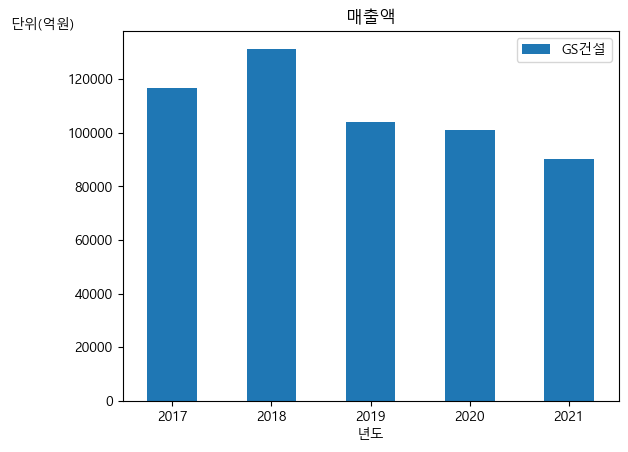

In [ ]:
# 매출액
def Sales(company_name):
    cond1 = (df1['기업명'] == company_name)
    df = df1.loc[cond1]
    df = df.drop_duplicates('기업명')
    df = df[['기업명', '2017_매출액', '2018_매출액', '2019_매출액', '2020_매출액','2021_매출액']]
    df = df.rename(columns = {'2017_매출액' : '2017', '2018_매출액' : '2018', '2019_매출액' : '2019', '2020_매출액' : '2020','2021_매출액' : '2021'})
    df = df.T
    df = df.rename(columns = df.iloc[0])
    df = df.drop(index = '기업명')
    df = df.astype('float')
    print(df.dtypes)
    df.plot(kind = 'bar')
    plt.title('매출액')
    plt.xticks(rotation=0)
    plt.xlabel('년도', rotation = 0)
    plt.ylabel('단위(억원)', rotation = 0, labelpad = -5.0, loc = 'top')
    
Sales('GS건설')

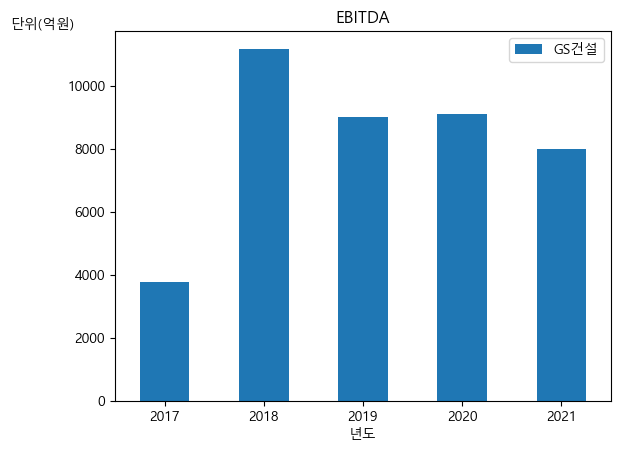

In [ ]:
# EBITDA
def EBITDA(company_name):
    cond1 = (df1['기업명'] == company_name)
    df = df1.loc[cond1]
    df = df.drop_duplicates('기업명')
    df = df[['기업명', '2017_EBITDA', '2018_EBITDA', '2019_EBITDA', '2020_EBITDA','2021_EBITDA']]
    df = df.rename(columns = {'2017_EBITDA' : '2017', '2018_EBITDA' : '2018', '2019_EBITDA' : '2019', '2020_EBITDA' : '2020','2021_EBITDA' : '2021'})
    df = df.T
    df = df.rename(columns = df.iloc[0])
    df = df.drop(index = '기업명')
    df = df.astype('float')
    df.dtypes
    df.plot(kind = 'bar')
    plt.title('EBITDA')
    plt.xticks(rotation=0)
    plt.xlabel('년도', rotation = 0)
    plt.ylabel('단위(억원)', rotation = 0, labelpad = -5.0, loc = 'top')
    
EBITDA('GS건설')

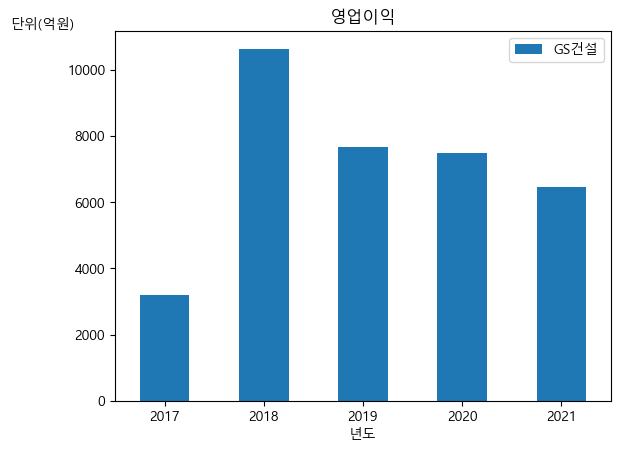

In [ ]:
# 영업이익
def Operating_Profit(company_name):
    cond1 = (df1['기업명'] == company_name)
    df = df1.loc[cond1]
    df = df.drop_duplicates('기업명')
    df = df[['기업명', '2017_영업이익', '2018_영업이익', '2019_영업이익', '2020_영업이익','2021_영업이익']]
    df = df.rename(columns = {'2017_영업이익' : '2017', '2018_영업이익' : '2018', '2019_영업이익' : '2019', '2020_영업이익' : '2020','2021_영업이익' : '2021'})
    df = df.T
    df = df.rename(columns = df.iloc[0])
    df = df.drop(index = '기업명')
    df = df.astype('float')
    df.dtypes
    df.plot(kind = 'bar')
    plt.title('영업이익')
    plt.xticks(rotation=0)
    plt.xlabel('년도', rotation = 0)
    plt.ylabel('단위(억원)', rotation = 0, labelpad = -5.0, loc = 'top')
    
Operating_Profit('GS건설')

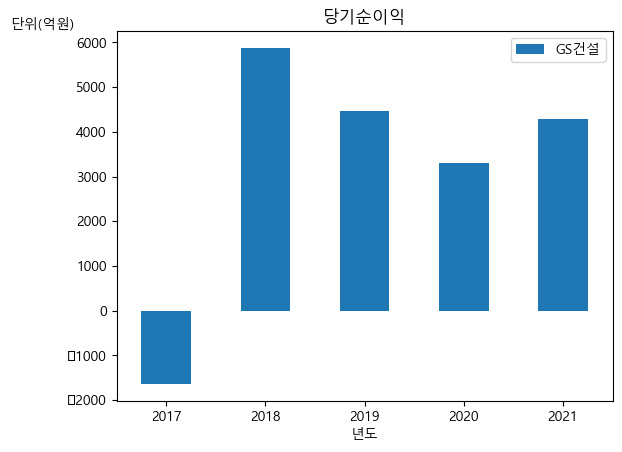

In [ ]:
# 당기순이익
def Net_income(company_name):
    cond1 = (df1['기업명'] == company_name)
    df = df1.loc[cond1]
    df = df.drop_duplicates('기업명')
    df = df[['기업명', '2017_당기순이익', '2018_당기순이익', '2019_당기순이익', '2020_당기순이익','2021_당기순이익']]
    df = df.rename(columns = {'2017_당기순이익' : '2017', '2018_당기순이익' : '2018', '2019_당기순이익' : '2019', '2020_당기순이익' : '2020','2021_당기순이익' : '2021'})
    df = df.T
    df = df.rename(columns = df.iloc[0])
    df = df.drop(index = '기업명')
    df = df.astype('float')
    df.dtypes
    df.plot(kind = 'bar')
    plt.title('당기순이익')
    plt.xticks(rotation=0)
    plt.xlabel('년도', rotation = 0)
    plt.ylabel('단위(억원)', rotation = 0, labelpad = -5.0, loc = 'top')
    
Net_income('GS건설')

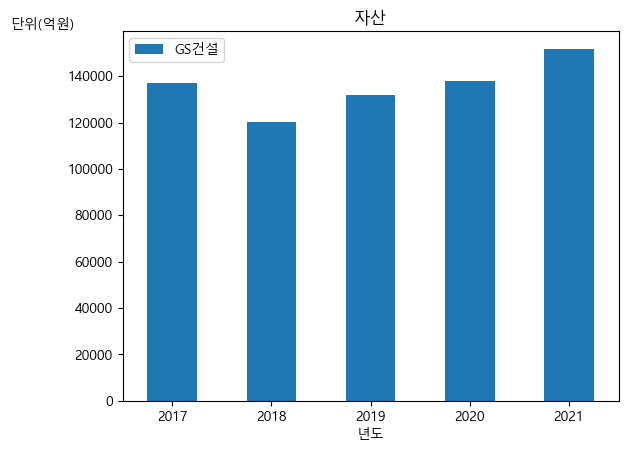

In [ ]:
# 자산
def Asset(company_name):
    cond1 = (df1['기업명'] == company_name)
    df = df1.loc[cond1]
    df = df.drop_duplicates('기업명')
    df = df[['기업명', '2017_자산', '2018_자산', '2019_자산', '2020_자산','2021_자산']]
    df = df.rename(columns = {'2017_자산' : '2017', '2018_자산' : '2018', '2019_자산' : '2019', '2020_자산' : '2020','2021_자산' : '2021'})
    df = df.T
    df = df.rename(columns = df.iloc[0])
    df = df.drop(index = '기업명')
    df = df.astype('float')
    df.dtypes
    df.plot(kind = 'bar')
    plt.title('자산')
    plt.xticks(rotation=0)
    plt.xlabel('년도', rotation = 0)
    plt.ylabel('단위(억원)', rotation = 0, labelpad = -5.0, loc = 'top')
    
Asset('GS건설')

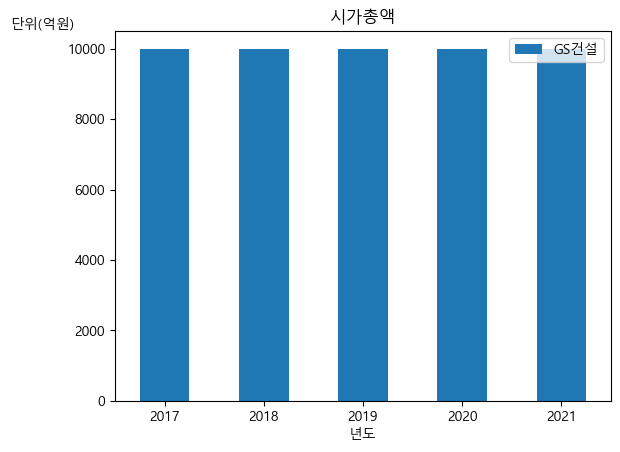

In [ ]:
# 시가총액
def Aggregate_Value(company_name):
    cond1 = (df1['기업명'] == company_name)
    df = df1.loc[cond1]
    df = df.drop_duplicates('기업명')
    df = df[['기업명', '2017_시가총액', '2018_시가총액', '2019_시가총액', '2020_시가총액','2021_시가총액']]
    df = df.fillna(0)
    df = df.rename(columns = {'2017_시가총액' : '2017', '2018_시가총액' : '2018', '2019_시가총액' : '2019', '2020_시가총액' : '2020','2021_시가총액' : '2021'})
    df = df.T
    df = df.rename(columns = df.iloc[0])
    df = df.drop(index = '기업명')
    df
    df.replace('', '0')
    df = df.astype('float')
    df.dtypes
    df.plot(kind = 'bar')
    plt.title('시가총액')
    plt.xticks(rotation=0)
    plt.xlabel('년도', rotation = 0)
    plt.ylabel('단위(억원)', rotation = 0, labelpad = -5.0, loc = 'top')
    
Aggregate_Value('GS건설')

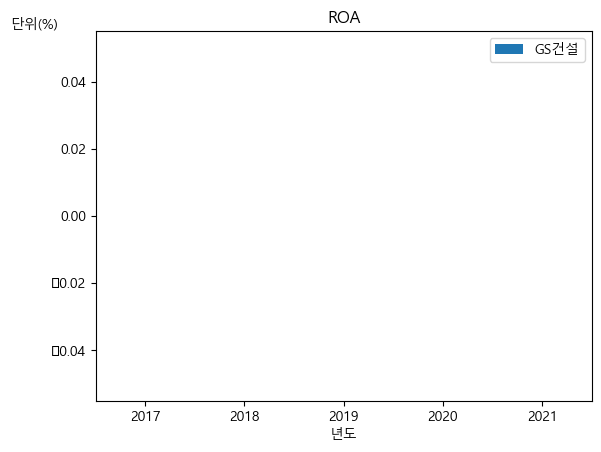

In [ ]:
# ROA
def ROA(company_name):
    cond1 = (df1['기업명'] == company_name)
    df = df1.loc[cond1]
    df = df.drop_duplicates('기업명')
    df = df[['기업명', '2017_ROA', '2018_ROA', '2019_ROA', '2020_ROA','2021_ROA']]
    df = df.rename(columns = {'2017_ROA' : '2017', '2018_ROA' : '2018', '2019_ROA' : '2019', '2020_ROA' : '2020','2021_ROA' : '2021'})
    df = df.T
    df = df.rename(columns = df.iloc[0])
    df = df.drop(index = '기업명')
    df = df.astype('float')
    df.dtypes
    df.plot(kind = 'bar')
    plt.title('ROA')
    plt.xticks(rotation=0)
    plt.xlabel('년도', rotation = 0)
    plt.ylabel('단위(%)', rotation = 0, labelpad = -5.0, loc = 'top')
    
ROA('GS건설')

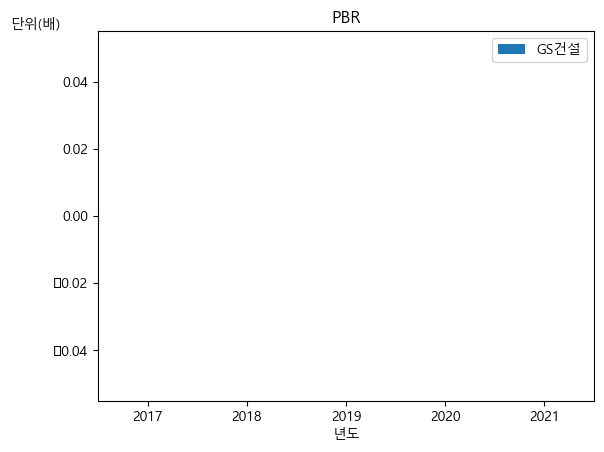

In [ ]:
# PBR
def PBR(company_name):
    cond1 = (df1['기업명'] == company_name)
    df = df1.loc[cond1]
    df = df.drop_duplicates('기업명')
    df = df[['기업명','2017_PBR', '2018_PBR', '2019_PBR', '2020_PBR','2021_PBR']]
    df = df.rename(columns = {'2017_PBR' : '2017', '2018_PBR' : '2018', '2019_PBR' : '2019', '2020_PBR' : '2020','2021_PBR' : '2021'})
    df = df.T
    df = df.rename(columns = df.iloc[0])
    df = df.drop(index = '기업명')
    df = df.astype('float')
    df.dtypes
    df.plot(kind = 'bar')
    plt.title('PBR')
    plt.xticks(rotation=0)
    plt.xlabel('년도', rotation = 0)
    plt.ylabel('단위(배)', rotation = 0, labelpad = -5.0, loc = 'top')
    
PBR('GS건설')

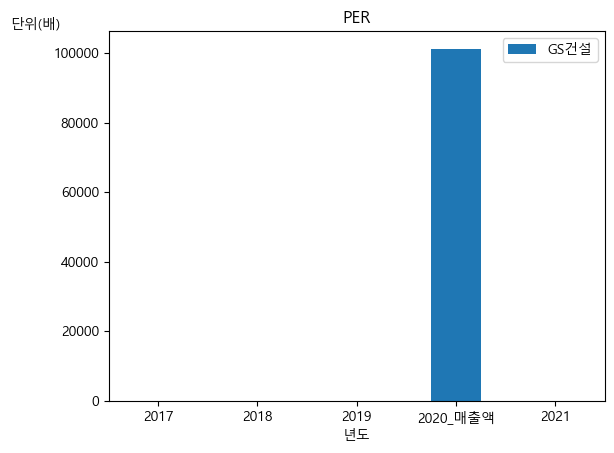

In [ ]:
# PER
def PER(company_name):
    cond1 = (df1['기업명'] == company_name)
    df = df1.loc[cond1]
    df = df.drop_duplicates('기업명')
    df = df[['기업명', '2017_PER', '2018_PER', '2019_PER', '2020_매출액','2021_PER']]
    df = df.rename(columns = {'2017_PER' : '2017', '2018_PER' : '2018', '2019_PER' : '2019', '2020_PER' : '2020','2021_PER' : '2021'})
    df = df.T
    df = df.rename(columns = df.iloc[0])
    df = df.drop(index = '기업명')
    df = df.astype('float')
    df.dtypes
    df.plot(kind = 'bar')
    plt.title('PER')
    plt.xticks(rotation=0)
    plt.xlabel('년도', rotation = 0)
    plt.ylabel('단위(배)', rotation = 0, labelpad = -5.0, loc = 'top')
    
PER('GS건설')

In [ ]:
new_df

,사업자등록번호,기업명,기업규모,대분류코드,업종,NTIS_성과ID,사업명,검증결과,기여율(확정)_x,과제명,...,인용수_y,청구항수_y,특허수,피인용수_y,특허활용도,특허영향력,특허경쟁력,AI,특허인용도,기술투자지수
0,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024192714,광역경제권선도산업육성,성공,50.0,제주용암해수를 활용한 고부가 응용상품 개발,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024643073,차세대에코이노베이션기술개발,성공,100.0,스마트 블록시스템 설계 및 구축 기술 개발,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.101110e+12,GS건설,0,NaN,0,PTO-2011-0024063522,차세대에코이노베이션기술개발,성공,100.0,토탈솔루션 형태의 지능형 상수도 통합관리 시스템 설계/시공/운영-대도시 상수도 시스...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.101110e+12,LG이노텍,0,NaN,0,0,0,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.101110e+12,LG이노텍,0,NaN,0,PTO-2011-0024163346,전자정보디바이스산업원천기술개발,성공,100.0,광도파로 매립형 다채널 전기-광 PCB 개발,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197558,NaN,아모레퍼시픽,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197559,NaN,아미노로직스,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197560,NaN,아바코,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197561,NaN,한솔이엠이,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_df.columns.tolist()

['사업자등록번호',
 '기업명',
 '기업규모',
 '대분류코드',
 '업종',
 'NTIS_성과ID',
 '사업명',
 '검증결과',
 '기여율(확정)_x',
 '과제명',
 '총연구비_합계(원)_x',
 '참여연구원_학위_박사_x',
 '참여연구원_학위_석사_x',
 '참여연구원_학위_학사이하_x',
 '연구책임자전공',
 '연구책임자학위_x',
 '발명자수_x',
 '인용수_x',
 '청구항수_x',
 '피인용수_x',
 '2017_시가총액',
 '2018_시가총액',
 '2019_시가총액',
 '2020_시가총액',
 '2021_시가총액',
 '2017_매출액',
 '2018_매출액',
 '2019_매출액',
 '2020_매출액',
 '2021_매출액',
 '2017_EBITDA',
 '2018_EBITDA',
 '2019_EBITDA',
 '2020_EBITDA',
 '2021_EBITDA',
 '2017_영업이익',
 '2018_영업이익',
 '2019_영업이익',
 '2020_영업이익',
 '2021_영업이익',
 '2017_당기순이익',
 '2018_당기순이익',
 '2019_당기순이익',
 '2020_당기순이익',
 '2021_당기순이익',
 '2017_자산',
 '2018_자산',
 '2019_자산',
 '2020_자산',
 '2021_자산',
 '2017_ROA',
 '2018_ROA',
 '2019_ROA',
 '2020_ROA',
 '2021_ROA',
 '2017_PBR',
 '2018_PBR',
 '2019_PBR',
 '2020_PBR',
 '2021_PBR',
 '2017_PER',
 '2018_PER',
 '2019_PER',
 '2020_PER',
 '2021_PER',
 'RND_유무',
 '기여율(확정)_y',
 '연구책임자학위_y',
 '참여연구원_학위_박사_y',
 '참여연구원_학위_석사_y',
 '참여연구원_학위_학사이하_y',
 '총연구비_합계(원)_y',
 '발명자수_y',
 '시가총액',
 '인용수_y',
 '

In [ ]:
new_df_1 = new_df[['기업명', '대분류코드',
 '2017_시가총액', '2018_시가총액', '2019_시가총액', '2020_시가총액', '2021_시가총액',
 '2017_매출액', '2018_매출액', '2019_매출액', '2020_매출액', '2021_매출액',
 '2017_EBITDA', '2018_EBITDA', '2019_EBITDA', '2020_EBITDA', '2021_EBITDA',
 '2017_ROA', '2018_ROA', '2019_ROA', '2020_ROA', '2021_ROA',
 '2017_PBR', '2018_PBR', '2019_PBR', '2020_PBR', '2021_PBR',
 '2017_PER', '2018_PER', '2019_PER', '2020_PER', '2021_PER',
 'RND_유무', '기여율(확정)_y', '연구책임자학위_y', '참여연구원_학위_박사_y', '참여연구원_학위_석사_y', '참여연구원_학위_학사이하_y', '총연구비_합계(원)_y', 
 '특허활용도', '특허영향력', '특허경쟁력', 'AI', '특허인용도', '기술투자지수']]

In [ ]:
new_df_1['시가총액'] = new_df_1[['2017_시가총액', '2018_시가총액', '2019_시가총액', '2020_시가총액', '2021_시가총액']].mean(axis = 'columns')
new_df_1['매출액'] = new_df_1[['2017_매출액', '2018_매출액', '2019_매출액', '2020_매출액', '2021_매출액']].mean(axis = 'columns')
new_df_1['EBITDA'] = new_df_1[['2017_EBITDA', '2018_EBITDA', '2019_EBITDA', '2020_EBITDA', '2021_EBITDA']].mean(axis = 'columns')
new_df_1['ROA'] = new_df_1[['2017_ROA', '2018_ROA', '2019_ROA', '2020_ROA', '2021_ROA']].mean(axis = 'columns')
new_df_1['PBR'] = new_df_1[['2017_PBR', '2018_PBR', '2019_PBR', '2020_PBR', '2021_PBR']].mean(axis = 'columns')
new_df_1['PER'] = new_df_1[['2017_PER', '2018_PER', '2019_PER', '2020_PER', '2021_PER']].mean(axis = 'columns')
new_df_1

,기업명,대분류코드,2017_시가총액,2018_시가총액,2019_시가총액,2020_시가총액,2021_시가총액,2017_매출액,2018_매출액,2019_매출액,...,특허경쟁력,AI,특허인용도,기술투자지수,시가총액,매출액,EBITDA,ROA,PBR,PER
0,GS건설,NaN,10000.00000,10000.000000,10000.0000,10000.000000,10000.00000,116794.56006,131393.72923,104165.89202,...,NaN,NaN,NaN,NaN,10000.000000,108789.848782,8212.467352,0.00000,0.00,0.000
1,GS건설,NaN,10000.00000,10000.000000,10000.0000,10000.000000,10000.00000,116794.56006,131393.72923,104165.89202,...,NaN,NaN,NaN,NaN,10000.000000,108789.848782,8212.467352,0.00000,0.00,0.000
2,GS건설,NaN,10000.00000,10000.000000,10000.0000,10000.000000,10000.00000,116794.56006,131393.72923,104165.89202,...,NaN,NaN,NaN,NaN,10000.000000,108789.848782,8212.467352,0.00000,0.00,0.000
3,LG이노텍,NaN,44080.63408,30448.380448,43133.9498,53192.470275,96148.26948,76413.60524,79821.03643,79753.66479,...,NaN,NaN,NaN,NaN,53400.740817,96172.458812,11748.061722,0.04593,2.01,156.752
4,LG이노텍,NaN,44080.63408,30448.380448,43133.9498,53192.470275,96148.26948,76413.60524,79821.03643,79753.66479,...,NaN,NaN,NaN,NaN,53400.740817,96172.458812,11748.061722,0.00000,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197558,아모레퍼시픽,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197559,아미노로직스,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197560,아바코,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197561,한솔이엠이,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_df_1.columns.tolist()

['기업명',
 '대분류코드',
 '2017_시가총액',
 '2018_시가총액',
 '2019_시가총액',
 '2020_시가총액',
 '2021_시가총액',
 '2017_매출액',
 '2018_매출액',
 '2019_매출액',
 '2020_매출액',
 '2021_매출액',
 '2017_EBITDA',
 '2018_EBITDA',
 '2019_EBITDA',
 '2020_EBITDA',
 '2021_EBITDA',
 '2017_ROA',
 '2018_ROA',
 '2019_ROA',
 '2020_ROA',
 '2021_ROA',
 '2017_PBR',
 '2018_PBR',
 '2019_PBR',
 '2020_PBR',
 '2021_PBR',
 '2017_PER',
 '2018_PER',
 '2019_PER',
 '2020_PER',
 '2021_PER',
 'RND_유무',
 '기여율(확정)_y',
 '연구책임자학위_y',
 '참여연구원_학위_박사_y',
 '참여연구원_학위_석사_y',
 '참여연구원_학위_학사이하_y',
 '총연구비_합계(원)_y',
 '특허활용도',
 '특허영향력',
 '특허경쟁력',
 'AI',
 '특허인용도',
 '기술투자지수',
 '시가총액',
 '매출액',
 'EBITDA',
 'ROA',
 'PBR',
 'PER']

In [ ]:
new_df_1 = new_df_1.drop(labels=['2017_시가총액', '2018_시가총액', '2019_시가총액', '2020_시가총액', '2021_시가총액',
 '2017_매출액', '2018_매출액', '2019_매출액', '2020_매출액', '2021_매출액',
 '2017_EBITDA', '2018_EBITDA', '2019_EBITDA', '2020_EBITDA', '2021_EBITDA',
 '2017_ROA', '2018_ROA', '2019_ROA', '2020_ROA', '2021_ROA',
 '2017_PBR', '2018_PBR', '2019_PBR', '2020_PBR', '2021_PBR',
 '2017_PER', '2018_PER', '2019_PER', '2020_PER', '2021_PER'], axis=1)
new_df_1

,기업명,대분류코드,RND_유무,기여율(확정)_y,연구책임자학위_y,참여연구원_학위_박사_y,참여연구원_학위_석사_y,참여연구원_학위_학사이하_y,총연구비_합계(원)_y,특허활용도,...,특허경쟁력,AI,특허인용도,기술투자지수,시가총액,매출액,EBITDA,ROA,PBR,PER
0,GS건설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10000.000000,108789.848782,8212.467352,0.00000,0.00,0.000
1,GS건설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10000.000000,108789.848782,8212.467352,0.00000,0.00,0.000
2,GS건설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10000.000000,108789.848782,8212.467352,0.00000,0.00,0.000
3,LG이노텍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,53400.740817,96172.458812,11748.061722,0.04593,2.01,156.752
4,LG이노텍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,53400.740817,96172.458812,11748.061722,0.00000,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197558,아모레퍼시픽,0,1.0,100.0,3.0,9.0,6.0,0.0,1.330000e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197559,아미노로직스,0,1.0,100.0,3.0,9.0,26.0,8.0,2.793000e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197560,아바코,0,1.0,100.0,2.0,2.0,2.0,9.0,1.800000e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197561,한솔이엠이,0,1.0,100.0,2.0,2.0,8.0,15.0,3.620000e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_df_1 = new_df_1.rename(columns = {'기여율(확정)_y' : '기여율(확정)',
 '연구책임자학위_y' : '연구책임자학위',
 '참여연구원_학위_박사_y' : '참여연구원_학위_박사',
 '참여연구원_학위_석사_y' : '참여연구원_학위_석사',
 '참여연구원_학위_학사이하_y' : '참여연구원_학위_학사이하',
 '총연구비_합계(원)_y' : '총연구비_합계(원)',
 '발명자수_y' : '발명자수',
 '인용수_y' : '인용수',
 '청구항수_y' : '청구항수',
 '피인용수_y' : '피인용수'})
new_df_1

,기업명,대분류코드,RND_유무,기여율(확정),연구책임자학위,참여연구원_학위_박사,참여연구원_학위_석사,참여연구원_학위_학사이하,총연구비_합계(원),특허활용도,...,특허경쟁력,AI,특허인용도,기술투자지수,시가총액,매출액,EBITDA,ROA,PBR,PER
0,GS건설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10000.000000,108789.848782,8212.467352,0.00000,0.00,0.000
1,GS건설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10000.000000,108789.848782,8212.467352,0.00000,0.00,0.000
2,GS건설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10000.000000,108789.848782,8212.467352,0.00000,0.00,0.000
3,LG이노텍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,53400.740817,96172.458812,11748.061722,0.04593,2.01,156.752
4,LG이노텍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,53400.740817,96172.458812,11748.061722,0.00000,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197558,아모레퍼시픽,0,1.0,100.0,3.0,9.0,6.0,0.0,1.330000e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197559,아미노로직스,0,1.0,100.0,3.0,9.0,26.0,8.0,2.793000e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197560,아바코,0,1.0,100.0,2.0,2.0,2.0,9.0,1.800000e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197561,한솔이엠이,0,1.0,100.0,2.0,2.0,8.0,15.0,3.620000e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_df_1.columns.tolist()

['기업명',
 '대분류코드',
 'RND_유무',
 '기여율(확정)',
 '연구책임자학위',
 '참여연구원_학위_박사',
 '참여연구원_학위_석사',
 '참여연구원_학위_학사이하',
 '총연구비_합계(원)',
 '특허활용도',
 '특허영향력',
 '특허경쟁력',
 'AI',
 '특허인용도',
 '기술투자지수',
 '시가총액',
 '매출액',
 'EBITDA',
 'ROA',
 'PBR',
 'PER']

In [ ]:
new_df_1['연구책임자학위'].value_counts()
new_df_1['참여연구원_학위_박사'].value_counts()
new_df_1['참여연구원_학위_석사'].value_counts()
new_df_1['참여연구원_학위_학사이하'].value_counts()

2.0     13521
3.0      4290
0.0      4097
1.0        10
4.0         7
15.0        6
16.0        6
14.0        6
9.0         4
12.0        4
6.0         3
26.0        1
Name: 연구책임자학위, dtype: int64

1.0      12301
0.0       5386
12.0      4096
4.0        101
3.0         13
2.0          8
8.0          6
11.0         6
56.0         6
53.0         6
50.0         6
20.0         5
9.0          4
10.0         2
91.0         2
5.0          2
7.0          1
14.0         1
25.0         1
16.0         1
126.0        1
Name: 참여연구원_학위_박사, dtype: int64

14.0     8139
0.0      4101
18.0     4098
7.0      4086
5.0      1091
1.0       261
11.0       66
8.0        35
2.0         7
4.0         6
163.0       6
59.0        6
82.0        6
6.0         5
43.0        4
24.0        3
42.0        3
39.0        3
15.0        3
3.0         3
12.0        3
10.0        3
165.0       2
22.0        2
33.0        2
26.0        2
29.0        2
21.0        1
20.0        1
13.0        1
19.0        1
31.0        1
38.0        1
110.0       1
Name: 참여연구원_학위_석사, dtype: int64

27.0     4128
0.0      4106
4.0      4103
14.0     4085
31.0     4043
12.0     1024
20.0      256
6.0        65
17.0       65
1.0        11
38.0        9
8.0         6
135.0       6
193.0       6
3.0         4
49.0        4
16.0        3
7.0         3
23.0        3
33.0        2
2.0         2
342.0       2
10.0        2
9.0         2
15.0        2
22.0        2
13.0        2
39.0        2
24.0        1
11.0        1
35.0        1
21.0        1
5.0         1
137.0       1
116.0       1
Name: 참여연구원_학위_학사이하, dtype: int64

In [ ]:
new_df_1['연구자점수'] = new_df_1[['연구책임자학위', '참여연구원_학위_박사', '참여연구원_학위_석사', '참여연구원_학위_학사이하']].mean(axis = 'columns')
new_df_1 = new_df_1.drop(labels=['연구책임자학위', '참여연구원_학위_박사', '참여연구원_학위_석사', '참여연구원_학위_학사이하'], axis=1)
new_df_1

,기업명,대분류코드,RND_유무,기여율(확정),총연구비_합계(원),특허활용도,특허영향력,특허경쟁력,AI,특허인용도,기술투자지수,시가총액,매출액,EBITDA,ROA,PBR,PER,연구자점수
0,GS건설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000,108789.848782,8212.467352,0.00000,0.00,0.000,NaN
1,GS건설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000,108789.848782,8212.467352,0.00000,0.00,0.000,NaN
2,GS건설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000,108789.848782,8212.467352,0.00000,0.00,0.000,NaN
3,LG이노텍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53400.740817,96172.458812,11748.061722,0.04593,2.01,156.752,NaN
4,LG이노텍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53400.740817,96172.458812,11748.061722,0.00000,0.00,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197558,아모레퍼시픽,0,1.0,100.0,1.330000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50
197559,아미노로직스,0,1.0,100.0,2.793000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.50
197560,아바코,0,1.0,100.0,1.800000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.75
197561,한솔이엠이,0,1.0,100.0,3.620000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.75


In [ ]:
new_df_1.isnull().sum()

기업명                0
대분류코드         110582
RND_유무        175608
기여율(확정)       175608
총연구비_합계(원)    175608
특허활용도         135508
특허영향력         135508
특허경쟁력         135508
AI            135508
특허인용도         135508
기술투자지수        135508
시가총액            3365
매출액             3365
EBITDA          3365
ROA             3365
PBR             3365
PER             3365
연구자점수         175608
dtype: int64

In [ ]:
new_df_1.columns

Index(['기업명', '대분류코드', 'RND_유무', '기여율(확정)', '총연구비_합계(원)', '특허활용도', '특허영향력',
       '특허경쟁력', 'AI', '특허인용도', '기술투자지수', '시가총액', '매출액', 'EBITDA', 'ROA', 'PBR',
       'PER', '연구자점수'],
      dtype='object')

In [ ]:
new_df_1 = new_df_1.drop_duplicates()
new_df_1

,기업명,대분류코드,RND_유무,기여율(확정),총연구비_합계(원),특허활용도,특허영향력,특허경쟁력,AI,특허인용도,기술투자지수,시가총액,매출액,EBITDA,ROA,PBR,PER,연구자점수
0,GS건설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000,108789.848782,8212.467352,0.00000,0.00,0.000,NaN
3,LG이노텍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53400.740817,96172.458812,11748.061722,0.04593,2.01,156.752,NaN
4,LG이노텍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53400.740817,96172.458812,11748.061722,0.00000,0.00,0.000,NaN
6,LG이노텍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36171.086921,96172.458812,11748.061722,0.04593,2.01,156.752,NaN
7,LG이노텍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36171.086921,96172.458812,11748.061722,0.00000,0.00,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197558,아모레퍼시픽,0,1.0,100.0,1.330000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50
197559,아미노로직스,0,1.0,100.0,2.793000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.50
197560,아바코,0,1.0,100.0,1.800000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.75
197561,한솔이엠이,0,1.0,100.0,3.620000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.75


In [ ]:
new_df_1.isnull().sum()

기업명              0
대분류코드          685
RND_유무        4706
기여율(확정)       4706
총연구비_합계(원)    4706
특허활용도         1240
특허영향력         1240
특허경쟁력         1240
AI            1240
특허인용도         1240
기술투자지수        1240
시가총액          3365
매출액           3365
EBITDA        3365
ROA           3365
PBR           3365
PER           3365
연구자점수         4706
dtype: int64

In [ ]:
new_df_1.columns

Index(['기업명', '대분류코드', 'RND_유무', '기여율(확정)', '총연구비_합계(원)', '특허활용도', '특허영향력',
       '특허경쟁력', 'AI', '특허인용도', '기술투자지수', '시가총액', '매출액', 'EBITDA', 'ROA', 'PBR',
       'PER', '연구자점수'],
      dtype='object')

In [ ]:
new_df_1['대분류코드'] = new_df_1['대분류코드'].fillna('Z')
new_df_1['RND_유무'] = new_df_1['RND_유무'].fillna(new_df_1['RND_유무'].median())
new_df_1['기여율(확정)'] = new_df_1['기여율(확정)'].fillna(new_df_1['기여율(확정)'].median())
new_df_1['총연구비_합계(원)'] = new_df_1['총연구비_합계(원)'].fillna(new_df_1['총연구비_합계(원)'].median())
new_df_1['특허활용도'] = new_df_1['특허활용도'].fillna(new_df_1['특허활용도'].median())
new_df_1['특허영향력'] = new_df_1['특허영향력'].fillna(new_df_1['특허영향력'].median())
new_df_1['특허경쟁력'] = new_df_1['특허경쟁력'].fillna(new_df_1['특허경쟁력'].median())
new_df_1['AI'] = new_df_1['AI'].fillna(new_df_1['AI'].median())
new_df_1['특허인용도'] = new_df_1['특허인용도'].fillna(new_df_1['특허인용도'].median())
new_df_1['기술투자지수'] = new_df_1['기술투자지수'].fillna(new_df_1['기술투자지수'].median())
new_df_1['시가총액'] = new_df_1['시가총액'].fillna(new_df_1['시가총액'].median())
new_df_1['매출액'] = new_df_1['매출액'].fillna(new_df_1['매출액'].median())
new_df_1['EBITDA'] = new_df_1['EBITDA'].fillna(new_df_1['EBITDA'].median())
new_df_1['ROA'] = new_df_1['ROA'].fillna(new_df_1['ROA'].median())
new_df_1['PBR'] = new_df_1['PBR'].fillna(new_df_1['PBR'].median())
new_df_1['PER'] = new_df_1['PER'].fillna(new_df_1['PER'].median())
new_df_1['연구자점수'] = new_df_1['연구자점수'].fillna(new_df_1['연구자점수'].median())

In [ ]:
new_df_1

,기업명,대분류코드,RND_유무,기여율(확정),총연구비_합계(원),특허활용도,특허영향력,특허경쟁력,AI,특허인용도,기술투자지수,시가총액,매출액,EBITDA,ROA,PBR,PER,연구자점수
0,GS건설,Z,1.0,100.0,5.530000e+08,0.001067,0.0,0.000399,3.375667,0.0,33.889162,10000.000000,108789.848782,8212.467352,0.00000,0.00,0.000,6.00
3,LG이노텍,Z,1.0,100.0,5.530000e+08,0.001067,0.0,0.000399,3.375667,0.0,33.889162,53400.740817,96172.458812,11748.061722,0.04593,2.01,156.752,6.00
4,LG이노텍,Z,1.0,100.0,5.530000e+08,0.001067,0.0,0.000399,3.375667,0.0,33.889162,53400.740817,96172.458812,11748.061722,0.00000,0.00,0.000,6.00
6,LG이노텍,Z,1.0,100.0,5.530000e+08,0.001067,0.0,0.000399,3.375667,0.0,33.889162,36171.086921,96172.458812,11748.061722,0.04593,2.01,156.752,6.00
7,LG이노텍,Z,1.0,100.0,5.530000e+08,0.001067,0.0,0.000399,3.375667,0.0,33.889162,36171.086921,96172.458812,11748.061722,0.00000,0.00,0.000,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197558,아모레퍼시픽,0,1.0,100.0,1.330000e+09,0.001067,0.0,0.000399,3.375667,0.0,33.889162,1216.968895,925.311758,73.938534,0.00000,0.00,0.000,4.50
197559,아미노로직스,0,1.0,100.0,2.793000e+09,0.001067,0.0,0.000399,3.375667,0.0,33.889162,1216.968895,925.311758,73.938534,0.00000,0.00,0.000,11.50
197560,아바코,0,1.0,100.0,1.800000e+08,0.001067,0.0,0.000399,3.375667,0.0,33.889162,1216.968895,925.311758,73.938534,0.00000,0.00,0.000,3.75
197561,한솔이엠이,0,1.0,100.0,3.620000e+08,0.001067,0.0,0.000399,3.375667,0.0,33.889162,1216.968895,925.311758,73.938534,0.00000,0.00,0.000,6.75


In [ ]:
new_df_1.isnull().sum()

기업명           0
대분류코드         0
RND_유무        0
기여율(확정)       0
총연구비_합계(원)    0
특허활용도         0
특허영향력         0
특허경쟁력         0
AI            0
특허인용도         0
기술투자지수        0
시가총액          0
매출액           0
EBITDA        0
ROA           0
PBR           0
PER           0
연구자점수         0
dtype: int64

In [ ]:
new_df_1.describe()

,RND_유무,기여율(확정),총연구비_합계(원),특허활용도,특허영향력,특허경쟁력,AI,특허인용도,기술투자지수,시가총액,매출액,EBITDA,ROA,PBR,PER,연구자점수
count,5357.000000,5357.000000,5.357000e+03,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5.357000e+03,5.357000e+03,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000
mean,1.007280,99.379317,5.967232e+08,0.018036,0.011874,40.219940,16.078936,1.074482,861.464321,2.425918e+04,3.245733e+04,9229.051475,0.007432,0.422258,10.547969,6.252193
std,0.186711,19.900149,5.204132e+08,0.047160,0.093117,365.741107,74.329917,4.369152,4619.780371,2.232387e+05,2.673537e+05,80539.367872,0.035706,1.124520,70.445056,3.294630
min,0.000000,0.000000,0.000000e+00,0.000029,0.000000,0.000000,2.603292,0.000000,0.000000,0.000000e+00,0.000000e+00,-552.157432,-0.596268,0.000000,0.000000,0.000000
25%,1.000000,100.000000,5.530000e+08,0.001067,0.000000,0.000100,2.603292,0.000000,10.279258,1.216969e+03,9.253118e+02,73.938534,0.000000,0.000000,0.000000,6.000000
50%,1.000000,100.000000,5.530000e+08,0.001067,0.000000,0.000399,3.375667,0.000000,33.889162,1.216969e+03,9.253118e+02,73.938534,0.000000,0.000000,0.000000,6.000000
75%,1.000000,100.000000,5.530000e+08,0.002273,0.000000,0.000990,7.188636,0.000000,68.869323,1.216969e+03,9.253118e+02,73.938534,0.000000,0.000000,0.000000,6.000000
max,10.000000,1000.000000,2.531280e+10,1.000000,1.000000,3366.005084,3163.000000,119.000000,41401.557355,3.713148e+06,2.460319e+06,741415.984000,0.273800,8.582000,886.438000,150.500000


In [ ]:
new_df_1 = new_df_1.drop_duplicates('기업명')
new_df_1

,기업명,대분류코드,RND_유무,기여율(확정),총연구비_합계(원),특허활용도,특허영향력,특허경쟁력,AI,특허인용도,기술투자지수,시가총액,매출액,EBITDA,ROA,PBR,PER,연구자점수
0,GS건설,Z,1.0,100.0,553000000.0,0.001067,0.0,0.000399,3.375667,0.0,33.889162,10000.000000,108789.848782,8212.467352,0.000000,0.00,0.000,6.0
3,LG이노텍,Z,1.0,100.0,553000000.0,0.001067,0.0,0.000399,3.375667,0.0,33.889162,53400.740817,96172.458812,11748.061722,0.045930,2.01,156.752,6.0
12291,SK텔레콤,Z,1.0,100.0,553000000.0,0.001067,0.0,0.000399,3.375667,0.0,33.889162,1014.000000,169942.042000,50639.134000,0.000000,0.00,0.000,6.0
12292,계양전기,Z,1.0,100.0,553000000.0,0.001067,0.0,0.000399,3.375667,0.0,33.889162,550.000000,3703.982304,170.183104,0.000000,0.00,0.000,6.0
12294,네패스,Z,1.0,100.0,553000000.0,0.001067,0.0,0.000399,3.375667,0.0,33.889162,5901.037623,3353.190560,747.423342,0.009846,2.92,17.680,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,식회사윈앤윈우드,S,1.0,100.0,553000000.0,0.125000,0.0,1.000000,395.375000,0.0,0.034094,1216.968895,925.311758,73.938534,0.000000,0.00,0.000,6.0
197545,식회사크린토피아,S,1.0,100.0,553000000.0,0.125000,0.0,1.000000,395.375000,0.0,0.034094,1216.968895,925.311758,73.938534,0.000000,0.00,0.000,6.0
197546,에스제이시스템,S,1.0,100.0,553000000.0,0.125000,0.0,1.000000,395.375000,0.0,0.034094,1216.968895,925.311758,73.938534,0.000000,0.00,0.000,6.0
197547,유닉유니온,S,1.0,100.0,553000000.0,0.125000,1.0,2.000000,395.375000,5.0,0.017047,1216.968895,925.311758,73.938534,0.000000,0.00,0.000,6.0


In [ ]:
new_df_1.to_csv('modeling_df.csv', encoding = 'utf-8-sig', index = False)